In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? غ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# *PR-2 Image_Segmentation*

In [ ]:
import os
from PIL import Image
import numpy as np
import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import natsort
from os import listdir
from sklearn.cluster import KMeans
from random import randint
from sklearn.metrics import f1_score

Mount data from google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1 


load data images


In [ ]:
def load_data(images_sub_path , ground_sub_path , _type , matrix_shape):

  images_ = []
  groundTruth_ = []
  path_images = images_sub_path + _type
  path_groundT = ground_sub_path + _type

  images_dir = listdir(path_images)
  
  if _type == '/test/':
    for i in range(50):
      images_.append(images_dir[i])
    images_dir_list = images_
  
  else:
    images_dir_list = images_dir
    
  print(len(images_dir_list))   
  images_matrix = np.arange(matrix_shape[0] * matrix_shape[1]).reshape(matrix_shape)

  pixels = matrix_shape[0] // len(images_dir_list)
  dim = matrix_shape[1]

  itr = 0
  for image in images_dir_list:
    gT = loadmat(path_groundT + image[:-4])
    img = Image.open(path_images + image)
    images_matrix[pixels * itr : pixels + (pixels * itr),:] = np.array(img).reshape(pixels , dim)

    for m in range(0,gT['groundTruth'].shape[1]):
      groundTruth_.append(gT['groundTruth'][0][m][0][0][0])
    itr +=1
  
  return images_matrix , groundTruth_



In [ ]:
sub_images_path = '/content/drive/MyDrive/BSR/BSDS500/data/images'
sub_groundtruth_path = '/content/drive/MyDrive/BSR/BSDS500/data/groundTruth'

num_pixels = 321*481
num_dimen = 3
# TODO: reduce data_images_test to 50 pic 
test_imgs, test_gt = load_data(sub_images_path,sub_groundtruth_path,'/test/',(num_pixels*50,num_dimen))
train_imgs, train_gt = load_data(sub_images_path,sub_groundtruth_path ,'/train/', (num_pixels*200,num_dimen))
val_imgs, val_gt = load_data(sub_images_path,sub_groundtruth_path,'/val/', (num_pixels*100,num_dimen))
print(test_imgs.shape)

50
200
100
(7720050, 3)


load data ground truth

<Figure size 432x288 with 0 Axes>

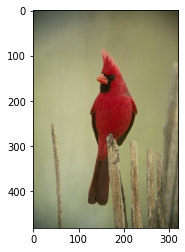

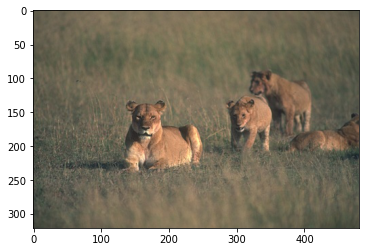

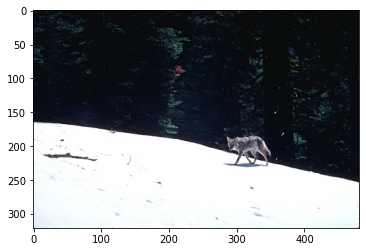

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(test_imgs[:num_pixels].reshape(481,321,3));
plt.figure();
plt.imshow(train_imgs[:num_pixels].reshape(321,481,3))
plt.figure()
plt.imshow(val_imgs[:num_pixels].reshape(321,481,3))
plt.figure()

# 2) Visualization 

In [ ]:
def visualization(images , groundTruth_):
  plt.title("Image")
  plt.imshow(images[num_pixels * 2 : num_pixels + (num_pixels * 2)].reshape(321 , 481 ,3));
  plt.figure();

  plt.title("Ground Truth Images")
  plt.imshow(groundTruth_[10]);
  plt.figure();
  
  plt.imshow(groundTruth_[11]);
  plt.figure();
  
  plt.imshow(groundTruth_[12]);
  plt.figure();
  
  plt.imshow(groundTruth_[13]);
  plt.figure();
  
  plt.imshow(groundTruth_[15]);
  plt.figure()

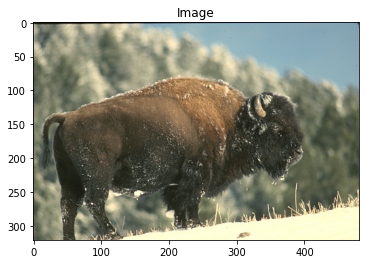

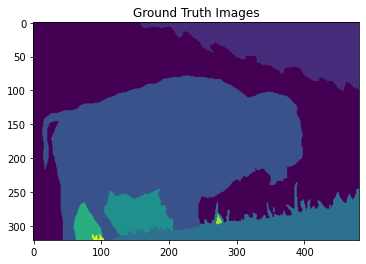

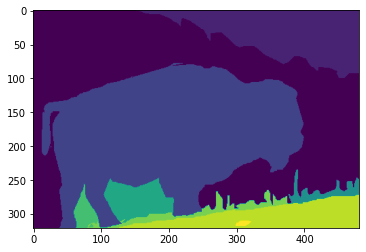

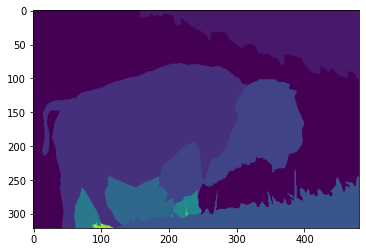

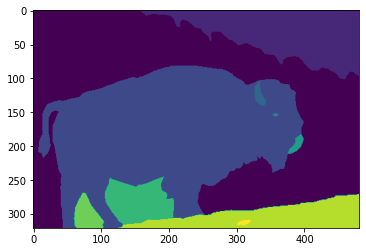

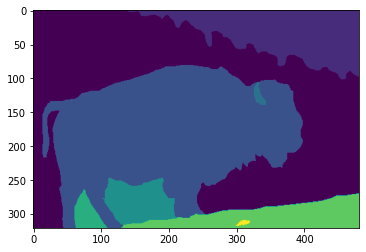

<Figure size 432x288 with 0 Axes>

In [ ]:
visualization(test_imgs , test_gt)

# Q3


# **a)**

In [ ]:
def Kmeans_clustring(test_iamges):
  k_values = [3 , 5 , 7 , 9 , 11]
  clustered_images = []
 
  for k in k_values:
    for i in range(3):              #for 3 samples only
      image = test_iamges[num_pixels * i : num_pixels + (num_pixels * i)]
      clustring = KMeans(n_clusters= k , random_state=0).fit(image)
      colored_image = coloring_images(clustring.labels_ , image , k)
      clustered_images.append(colored_image)

  return clustered_images

    

In [ ]:
def coloring_images(lables , original_image , k):
  colored_image = np.zeros(original_image.shape , dtype = "uint8")
  colors = []

  for k_number in range(k):
    r = randint(0,225)
    g = randint(0,225)
    b = randint(0,225)
    rgb = [r , g , b]
    colors.append(np.array(rgb))
  
  for i in range(original_image.shape[0]):
    colored_image[i] = colors[lables[i]]

  return colored_image



In [ ]:
clustred_image = Kmeans_clustring(test_imgs)

[1 1 1 ... 1 1 1]
[0 0 0 ... 1 1 1]
[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[0 0 0 ... 4 4 4]
[4 4 4 ... 4 4 4]
[0 0 0 ... 5 1 1]
[2 2 2 ... 3 3 3]
[0 0 0 ... 0 0 0]
[0 0 0 ... 3 1 1]
[4 4 4 ... 3 3 3]
[9 9 9 ... 1 1 1]
[6 6 6 ... 1 1 1]
[0 0 0 ... 2 2 2]


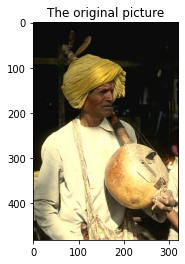

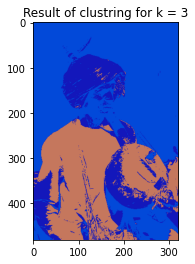

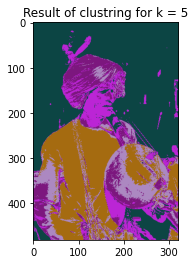

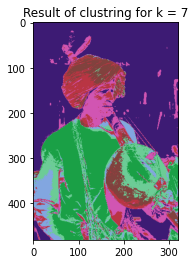

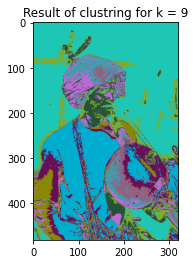

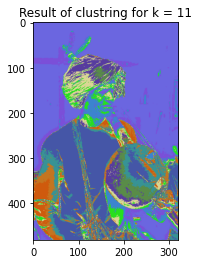

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(test_imgs[num_pixels * 1 : num_pixels + (num_pixels * 1)].reshape(481 , 321 , 3));
plt.title("The original picture")
plt.figure();

plt.imshow(clustred_image[1].reshape(481 , 321 , 3));
plt.title("Result of clustring for k = 3")
plt.figure();

plt.imshow(clustred_image[4].reshape(481 , 321 , 3));
plt.title("Result of clustring for k = 5")
plt.figure();
  
plt.imshow(clustred_image[7].reshape(481 , 321 , 3));
plt.title("Result of clustring for k = 7")
plt.figure();

plt.imshow(clustred_image[10].reshape(481 , 321 , 3));
plt.title("Result of clustring for k = 9")
plt.figure();
  
plt.imshow(clustred_image[13].reshape(481 , 321 , 3));
plt.title("Result of clustring for k = 11")
plt.figure();
  

# **b)**

In [ ]:
def calculate_f1_measure(ground_truth_images , clustred_images):
  f1_scores = []
  entrophy_scores = []

  for i in range(5):
    
    f1_scores.append(f1_score( , ,average= 'macro'))
    entrophy_scores.append()


In [ ]:
f1 , entrophy = calculate_f1_measure(test_gt , clustred_image)

# Q4

In [ ]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1
for i in infinite_sequence():
  print(i)

Streaming output truncated to the last 5000 lines.
431218
431219
431220
431221
431222
431223
431224
431225
431226
431227
431228
431229
431230
431231
431232
431233
431234
431235
431236
431237
431238
431239
431240
431241
431242
431243
431244
431245
431246
431247
431248
431249
431250
431251
431252
431253
431254
431255
431256
431257
431258
431259
431260
431261
431262
431263
431264
431265
431266
431267
431268
431269
431270
431271
431272
431273
431274
431275
431276
431277
431278
431279
431280
431281
431282
431283
431284
431285
431286
431287
431288
431289
431290
431291
431292
431293
431294
431295
431296
431297
431298
431299
431300
431301
431302
431303
431304
431305
431306
431307
431308
431309
431310
431311
431312
431313
431314
431315
431316
431317
431318
431319
431320
431321
431322
431323
431324
431325
431326
431327
431328
431329
431330
431331
431332
431333
431334
431335
431336
431337
431338
431339
431340
431341
431342
431343
431344
431345
431346
431347
431348
431349
431350
431351
431352
4313

# Q5


In [ ]:
print(randint(255))
randint(255)

NameError: ignored